### 1) Calculate all the coeficients

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [3]:
white = pd.read_csv("winequality-white.csv", sep=';')
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
X = white[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = white['quality']

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:51:11   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# Interpretation
# coef - shows the effect of feature on target (quality)
# const - intercept (not meaningful in itself)
# R-squared - show what share of quality variation can be explained by the mode - the bigger the value, 
# the more predictive power model has (max at 1)

### 2) Calculate p-values. 

In [6]:
results.pvalues

const                   1.707781e-15
fixed acidity           1.706038e-03
volatile acidity        1.058005e-58
citric acid             8.175888e-01
residual sugar          5.298587e-27
chlorides               6.509735e-01
free sulfur dioxide     9.994821e-06
total sulfur dioxide    4.497912e-01
density                 4.044493e-15
pH                      8.102311e-11
sulphates               3.440472e-10
alcohol                 1.699500e-15
dtype: float64

In [44]:
#removed p-values that is > 0.05: citric acid, chlorides, total sulfur dioxide  and got these pvalues:

In [11]:
X_new = white[['fixed acidity', 'volatile acidity', 'residual sugar',
        'free sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = white['quality']

X_new = sm.add_constant(X_new)
model = sm.OLS(y,X_new)
results = model.fit()

In [12]:
results.pvalues

const                  2.206827e-17
fixed acidity          8.643880e-04
volatile acidity       1.020239e-64
residual sugar         1.391738e-29
free sulfur dioxide    7.673309e-07
density                5.275581e-17
pH                     2.066280e-11
sulphates              3.522028e-10
alcohol                1.306643e-15
dtype: float64

### 3)

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
features = white[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

def corr_plot(mat, title='My Title', color='cividis'):
    plt.subplots(figsize=(14, 11))
    plt.title(title,fontsize=22)

    sns.heatmap(mat,linewidths=0.2,vmax=0.7,square=True,cmap=color, 
                linecolor='w',annot=True,annot_kws={'size':9},cbar_kws={'shrink': .5})

In [15]:
corr_matrix = features.corr()

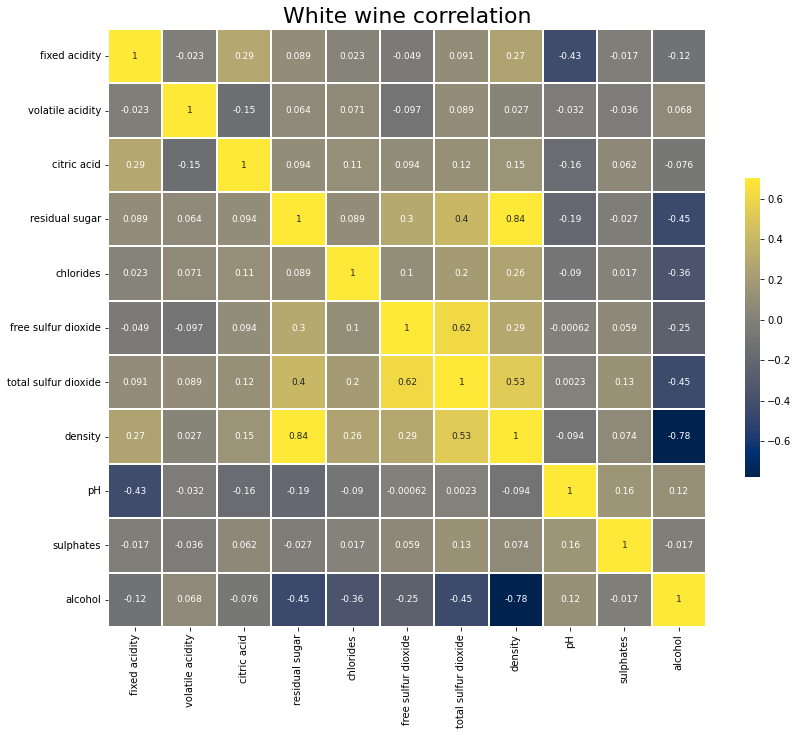

In [16]:
corr_plot(corr_matrix, "White wine correlation")

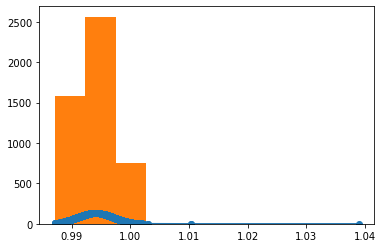

In [24]:
import scipy.stats as stats

h = sorted(white['density'])
hmean = np.mean(h)
hstd = np.std(h)
pdf = stats.norm.pdf(h, np.mean(h), np.std(h))

plt.plot(h,pdf,'-o')

plt.hist(h)      

plt.show()  

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import mean_absolute_error

def rmse(y_test, y_pred):
    """root mean squared error"""
    return round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)

def mape(y_test, y_pred):
    return round(mean_absolute_percentage_error(y_test, y_pred), 4)

def wmape(y_true, y_pred):
    return sum(np.abs(y_true-y_pred))*100 / sum(y_true)

In [21]:
# Let's use 70% of random sample to train the model, and the remaining 30% of sample to test how good is the model
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size = 0.7, random_state=412)

lr = LinearRegression()
reg = lr.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(f'MAPE: {mape(y_test, y_pred)}')
print(f'WMAPE: {wmape(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')
print(f'MAE: ${mean_absolute_error(y_test, y_pred):,.2f}')

MAPE: 0.1021
WMAPE: 9.858282190739901
RMSE: 0.7403
MAE: $0.58


In [22]:
# Smaller error means better model